# TOXIC COMMENTS CLASSIFIER

In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np

C:\Users\anank\AppData\Local\Temp\ipykernel_21948\207423726.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


### Data Collection

In [2]:
df = pd.read_csv('train.csv/train.csv')

### Exploratory Data Analysis

In [3]:
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [7]:
df.iloc[16]['comment_text']

"Bye! \n\nDon't look, come or think of comming back! Tosser."

In [8]:
df[df.columns[2:]].iloc[16]

toxic            1
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
Name: 16, dtype: int64

### Data Preprocessing

In [5]:
from tensorflow.keras.layers import TextVectorization

In [6]:
X = df['comment_text']
y = df[df.columns[2:]].values

In [7]:
df.columns

Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate'],
      dtype='object')

In [8]:
MAX_FEATURES = 20000 # number of words in the vocab

In [9]:
vectorizer = TextVectorization(max_tokens=MAX_FEATURES,
                               output_sequence_length=100,
                               output_mode='int')

In [10]:
vectorizer.adapt(X.values)

In [11]:
vectorizer.get_vocabulary()

['',
 '[UNK]',
 'the',
 'to',
 'of',
 'and',
 'a',
 'you',
 'i',
 'is',
 'that',
 'in',
 'it',
 'for',
 'this',
 'not',
 'on',
 'be',
 'as',
 'have',
 'are',
 'your',
 'with',
 'if',
 'article',
 'was',
 'or',
 'but',
 'page',
 'my',
 'an',
 'from',
 'by',
 'do',
 'at',
 'about',
 'me',
 'so',
 'wikipedia',
 'can',
 'what',
 'there',
 'all',
 'has',
 'will',
 'talk',
 'please',
 'would',
 'its',
 'no',
 'one',
 'just',
 'like',
 'they',
 'he',
 'dont',
 'which',
 'any',
 'been',
 'should',
 'more',
 'we',
 'some',
 'other',
 'who',
 'see',
 'here',
 'also',
 'his',
 'think',
 'im',
 'because',
 'know',
 'how',
 'am',
 'people',
 'why',
 'edit',
 'articles',
 'only',
 'out',
 'up',
 'when',
 'were',
 'use',
 'then',
 'may',
 'time',
 'did',
 'them',
 'now',
 'being',
 'their',
 'than',
 'thanks',
 'even',
 'get',
 'make',
 'good',
 'had',
 'very',
 'information',
 'does',
 'could',
 'well',
 'want',
 'such',
 'sources',
 'way',
 'name',
 'these',
 'deletion',
 'pages',
 'first',
 'help'

In [12]:
len(vectorizer.get_vocabulary())

20000

In [13]:
vectorizer('the to you')[:6]

<tf.Tensor: shape=(6,), dtype=int64, numpy=array([2, 3, 7, 0, 0, 0], dtype=int64)>

In [14]:
vectorized_text = vectorizer(X.values)

In [15]:
vectorized_text

<tf.Tensor: shape=(159571, 100), dtype=int64, numpy=
array([[ 645,   76,    2, ...,    0,    0,    0],
       [   1,   54, 2489, ...,    0,    0,    0],
       [ 425,  441,   70, ...,    0,    0,    0],
       ...,
       [   1, 7392,  383, ...,    0,    0,    0],
       [   5,   12,  534, ...,    0,    0,    0],
       [   5,    8,  130, ...,    0,    0,    0]], dtype=int64)>

In [16]:
#MCSHBAP - map, chache, shuffle, batch, prefetch  from_tensor_slices, list_file
dataset = tf.data.Dataset.from_tensor_slices((vectorized_text, y))
dataset = dataset.cache()
dataset = dataset.shuffle(16000)
dataset = dataset.batch(16)
dataset = dataset.prefetch(8) 

In [17]:
batch_X, batch_y = dataset.as_numpy_iterator().next()

In [18]:
batch_X

array([[3118, 5925, 3253, ...,    0,    0,    0],
       [  54,   25,   67, ...,    0,    0,    0],
       [ 433,   27, 1359, ...,  205,   38,   59],
       ...,
       [3872,  914,  865, ...,    0,    0,    0],
       [ 919,   14,    9, ...,    0,    0,    0],
       [   2,  374,  263, ...,    0,    0,    0]], dtype=int64)

In [19]:
batch_y

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]], dtype=int64)

In [20]:
batch_X.shape

(16, 100)

In [21]:
batch_y.shape

(16, 6)

In [22]:
len(dataset) #returns the number of batches, not number of samples *16=dataset

9974

In [23]:
train = dataset.take(int(len(dataset)*.7))
val = dataset.skip(int(len(dataset)*.7)).take(int(len(dataset)*.2))
test = dataset.skip(int(len(dataset)*.9)).take(int(len(dataset)*.1))

In [24]:
len(train) ##of batches for train

6981

### Sequential Model Creation

In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Bidirectional, Dense, Embedding

In [39]:
model = Sequential()
# Create the embedding layer 
model.add(Embedding(MAX_FEATURES+1, 32))
# Bidirectional LSTM Layer
model.add(Bidirectional(LSTM(32, activation='tanh')))
# Feature extractor Fully connected layers
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
# Final layer 
model.add(Dense(6, activation='sigmoid'))

In [40]:
model.compile(optimizer='Adam',
              loss='binary_crossentropy', 
              metrics=['accuracy'])

In [43]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 100, 32)        │       640,032 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 64)             │        16,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,195,060 (8.37 MB)

 Trainable params: 731,686 (2.79 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,463,374 (5.58 MB)

In [42]:
history = model.fit(train, epochs=3, validation_data=val)

Epoch 1/3


6981/6981 ━━━━━━━━━━━━━━━━━━━━ 455s 64ms/step - accuracy: 0.9277 - loss: 0.0852 - val_accuracy: 0.9937 - val_loss: 0.0507
Epoch 2/3
6981/6981 ━━━━━━━━━━━━━━━━━━━━ 363s 52ms/step - accuracy: 0.9678 - loss: 0.0489 - val_accuracy: 0.9940 - val_loss: 0.0479
Epoch 3/3
6981/6981 ━━━━━━━━━━━━━━━━━━━━ 370s 53ms/step - accuracy: 0.9555 - loss: 0.0442 - val_accuracy: 0.9934 - val_loss: 0.0457


In [46]:
loss, Acc = model.evaluate(test)

print('Test Loss: ', loss)
print('Test Accuracy: ', Acc)

997/997 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.9943 - loss: 0.0504
Test Loss:  0.05009913444519043
Test Accuracy:  0.9933550357818604


In [44]:
from matplotlib import pyplot as plt

<Figure size 800x500 with 0 Axes>

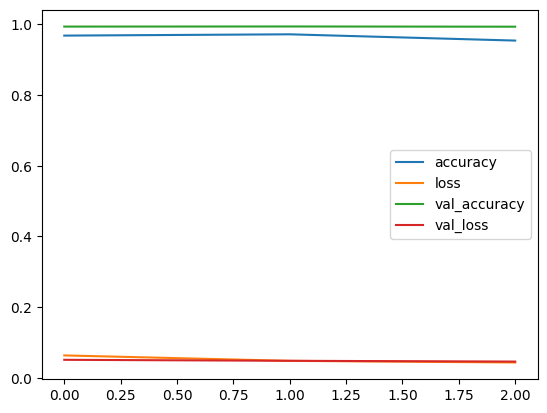

In [45]:
plt.figure(figsize=(8,5))
pd.DataFrame(history.history).plot()
plt.show()

### Predictions

In [40]:
input_text = vectorizer('You freaking suck! I am going to hit you.')

In [41]:
model.predict(np.expand_dims(input_text, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 897ms/step


array([[0.9955283 , 0.14685827, 0.96144384, 0.01205483, 0.80527216,
        0.06967667]], dtype=float32)

In [42]:
res = model.predict(np.expand_dims(input_text, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


In [43]:
df.columns[2:]

Index(['toxic', 'severe_toxic', 'obscene', 'threat', 'insult',
       'identity_hate'],
      dtype='object')

In [44]:
(res > 0.5).astype(int)

array([[1, 0, 1, 0, 1, 0]])

In [45]:
batch_X, batch_y = test.as_numpy_iterator().next()

In [46]:
batch_y

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 1, 1],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]], dtype=int64)

In [47]:
(model.predict(batch_X) > 0.5).astype(int)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 805ms/step


array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

### Model Evaluation

In [48]:
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy

In [49]:
pre = Precision()
re = Recall()
acc = CategoricalAccuracy()

In [50]:
for batch in test.as_numpy_iterator(): 
    # Unpack the batch 
     X_test, y_test = batch
    # make a prediction
     y_pred = model.predict(X_test)
    
     y_test = y_test.flatten()
     y_pred = y_pred.flatten()
    
     pre.update_state(y_test, y_pred)
     re.update_state(y_test, y_pred)
     acc.update_state(y_test, y_pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━

In [51]:
print(f'Precision: {pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision: 0.8390804529190063, Recall:0.643995463848114, Accuracy:0.4603811502456665


### Testing on Data

In [26]:
import tensorflow as tf

In [47]:
model.save('toxicity_ac99_testac99.h5')

ValueError: Unable to synchronously create dataset (name already exists)

In [48]:
model = tf.keras.models.load_model('toxicity_ac99_testac99.h5')

KeyError: "Unable to synchronously open object (object 'embedding' doesn't exist)"

In [98]:
# input_string = input("Enter a string: ")
# input_str = vectorizer(input_string)
# print(input_string)

In [59]:
# input_str = vectorizer('hey i freaken hate you!') Dear god this site is horrible.

In [92]:
# res = model.predict(np.expand_dims(input_str,0))

In [99]:
# res

In [51]:
def score_comment(comment):
    print(comment)
    vectorized_comment = vectorizer([comment])
    results = model.predict(vectorized_comment)
    print(results)
    text = ''
    for idx, col in enumerate(df.columns[2:]):
        text += '{}: {}\n'.format(col, results[0][idx]>0.5)
    print(text)

In [52]:
input_string = input("Enter a string: ")
score_comment(input_string)

I love this music
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
[[2.5951159e-03 1.0854303e-06 6.9526158e-04 4.8843326e-06 4.2039639e-05
  3.9151226e-05]]
toxic: False
severe_toxic: False
obscene: False
threat: False
insult: False
identity_hate: False

